## Frontend Lock-in amplifier model 

In [1]:
from console_progressbar import ProgressBar
from lock_in_model import DUTSemiconductor, Lockin, telegraphic_noise_coefficient
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

## Single V_DS sweep

Progress |#################################################-| 99% 

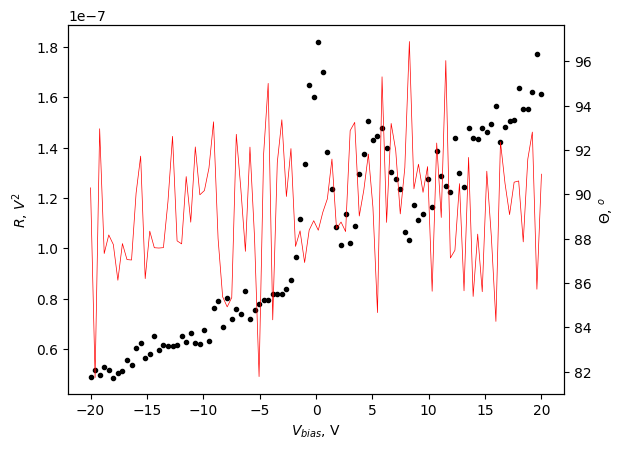

In [7]:
# Setting-up the progress-bar
pb = ProgressBar(
    total=100,
    prefix="Progress",
    decimals=0,
    length=50,
    fill="#",
    zfill="-",
)
# Create the DUT for the semiconductor
SC = DUTSemiconductor()
# Create the list for outputs:
r_out = []
t_out = []
# Number of vbias points
n_vbiases = 100
# Array of vbiases
v_bias_test = np.linspace(-0.02, 0.02, n_vbiases)
for vb, i in zip(v_bias_test, range(n_vbiases)):
    # Create the lockin setup
    Li = Lockin(v_bias=vb)
    # Applying the lockin measurement
    Li.lock_in_measurement(SC.i_interp)
    # outputing the R
    r_out.append(Li.sr865a_r[-1])
    # outputing the phase
    t_out.append(Li.sr865a_theta[-1])
    # printing the progressbar
    pb.print_progress_bar(i)
# plotting the results:
plt.plot(v_bias_test*1000, r_out, "k.")
plt.xlabel("$V_{bias}$, V")
plt.ylabel("$R$, $V^2$")
ax = plt.twinx()
ax.plot(v_bias_test*1000, 180*np.array(t_out)/np.pi, "r", linewidth=0.5)
plt.ylabel("$\\Theta$, $^o$")
plt.show()

## Multiple measurments with non-stationary noise

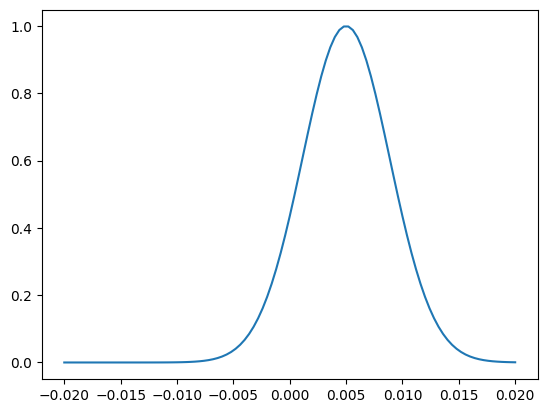

In [2]:
v_bias = np.linspace(-2e-2, 2e-2, 101)
plt.plot(v_bias, telegraphic_noise_coefficient(v_bias))
plt.show()

Progress |#################################################-| 99% 

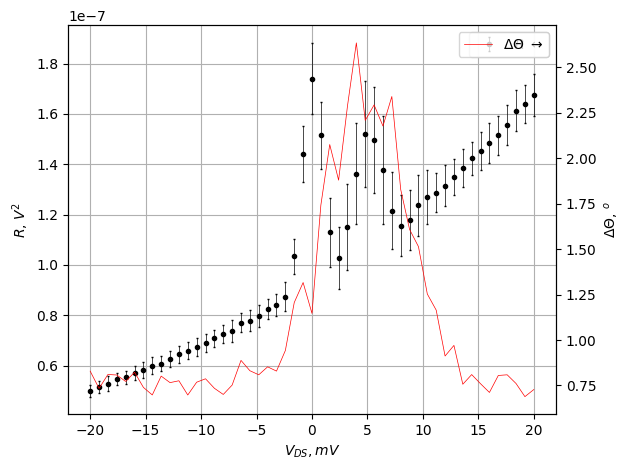

Progress |######--------------------------------------------| 13% 

In [4]:
v_bias = np.linspace(-2e-2, 2e-2, 51)
n_runs = 100
SC = DUTSemiconductor()

for Nsw in [10,100,200,500,1000, 2000]:    
    RRs = []
    TTs = []

    for l in range(n_runs):
        pb = ProgressBar(
            total=n_runs,
            prefix="Progress",
            decimals=0,
            length=50,
            fill="#",
            zfill="-",
        )
        r_out = []
        t_out = []
        for vb in v_bias:
            Li = Lockin(v_bias=vb, non_stat_noise=telegraphic_noise_coefficient(vb))
            Li.lock_in_measurement(SC.i_interp)
            r_out.append(Li.sr865a_r[-1])
            t_out.append(Li.sr865a_theta[-1])
        RRs.append(r_out)
        TTs.append(t_out)
        pb.print_progress_bar(l)
            
    RRs=np.array(RRs)
    TTs=np.array(TTs)

    TT_avg = np.mean(TTs,axis=0)
    TT_std = np.std(TTs,axis=0)

    RR_avg = np.mean(RRs,axis=0)
    RR_std = np.std(RRs,axis=0)

    plt.errorbar(v_bias*1000,np.real(RR_avg),np.real(RR_std), fmt="k.", linewidth=0.5, capsize=1, label="$R$ $\\leftarrow$")
    plt.xlabel("$V_{DS}, mV$")
    plt.ylabel("$R$, $V^2$")
    plt.legend()
    plt.grid()
    ax = plt.twinx()
    plt.plot(v_bias*1000,180*2.7*TT_std/np.sqrt(n_runs)/np.pi,"r",linewidth=0.5, label="$\\Delta\\Theta$ $\\rightarrow$")
    plt.ylabel("$\\Delta\\Theta$, $^o$")
    plt.legend()
    plt.tight_layout()
    plt.savefig("non_stationary%d.pdf"%Nsw)
    plt.show()